# Creating Widgets from Functions

In this notebook, we annotate a function to allow automatic widget generation with [magicgui](https://napari.org/magicgui/). We then add the widget to napari and run it.

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from magicgui import magicgui
import napari
from napari.utils import nbscreenshot
from napari.types import ImageData

## Annotating a function

Consider the following function:

In [2]:
def preprocess_image(image, background_subtraction_radius = 15, particle_radius = 5):
    """Apply background removal and denoising"""
    from skimage.morphology import white_tophat, disk
    from skimage.filters import gaussian
    
    footprint = disk(background_subtraction_radius)
    background_subtracted = white_tophat(image, footprint=footprint)
    denoised = gaussian(background_subtracted, sigma=particle_radius)
    return denoised

This function has 3 input arguments: an `image` and 2 other integer arguments; and it returns a processed image. The function has a brief docstring that describes what it does.

As you already know by now, we can have access to this information by quering the function and getting back its signature and docstring, like this:

In [3]:
preprocess_image?

Signature:
preprocess_image(
    image,
    background_subtraction_radius=15,
    particle_radius=5,
)
Docstring: Apply background removal and denoising
File:      c:\users\marcelo_researcher\appdata\local\temp\ipykernel_15748\314588285.py
Type:      function


Let's test this function with the blobs image.

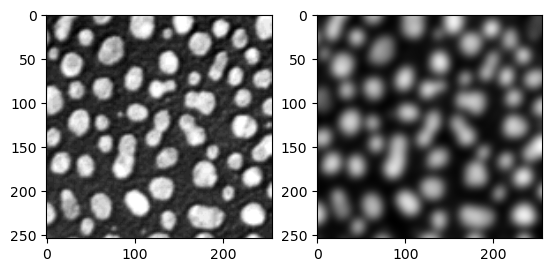

In [4]:
image = imread("../../data/blobs.tif")
denoised_image = preprocess_image(image)

fig, ax = plt.subplots(1,2)
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(denoised_image, cmap = 'gray')

In principle, the image argument can be of any type, just like any variable in Python. We have hints that the second and third arguments (`background_subtraction_radius` and `particle_radius`) should be integers because they have integer initial values. Still, if we want to build a GUI from that, we would have to design a proper widget to each of these variables ourselves.

However, since Python 3, annotations can be provided to indicate the expected variable type. This can be used by developers to build other functionalities on top of these functions.

Below, we show the same function, with annotations.

In [5]:
def preprocess_image2(image: ImageData, background_subtraction_radius: int = 15, particle_radius: int = 5) -> ImageData:
    """Apply background removal and denoising"""
    from skimage.morphology import white_tophat, disk
    from skimage.filters import gaussian
    
    footprint = disk(background_subtraction_radius)
    background_subtracted = white_tophat(image, footprint=footprint)
    denoised = gaussian(background_subtracted, sigma=particle_radius)
    return denoised

We put annotations to input arguments with the `:` character followed by the variable type. In this case, we add the custom [napari type](https://napari.org/stable/api/napari.types.html) `ImageData` to the input argument `image` and `int` types to the other input arguments.

We put annotations to the outputs with the `->` characters followed by the variable type, which in this case is again a napari `ImageData` type.

Notice that due to the fact that `ImageData` is a custom type from napari, we also had to import it in the beginning of this notebook.

Let's test this "new" function with the blobs image.

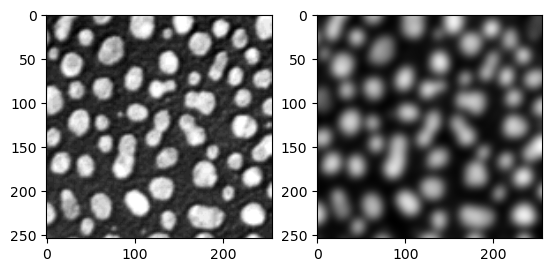

In [6]:
denoised_image = preprocess_image2(image)

fig, ax = plt.subplots(1,2)
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(denoised_image, cmap = 'gray')

There is no change in functionality, we get the same result as before!

Let's visualize these images to napari.

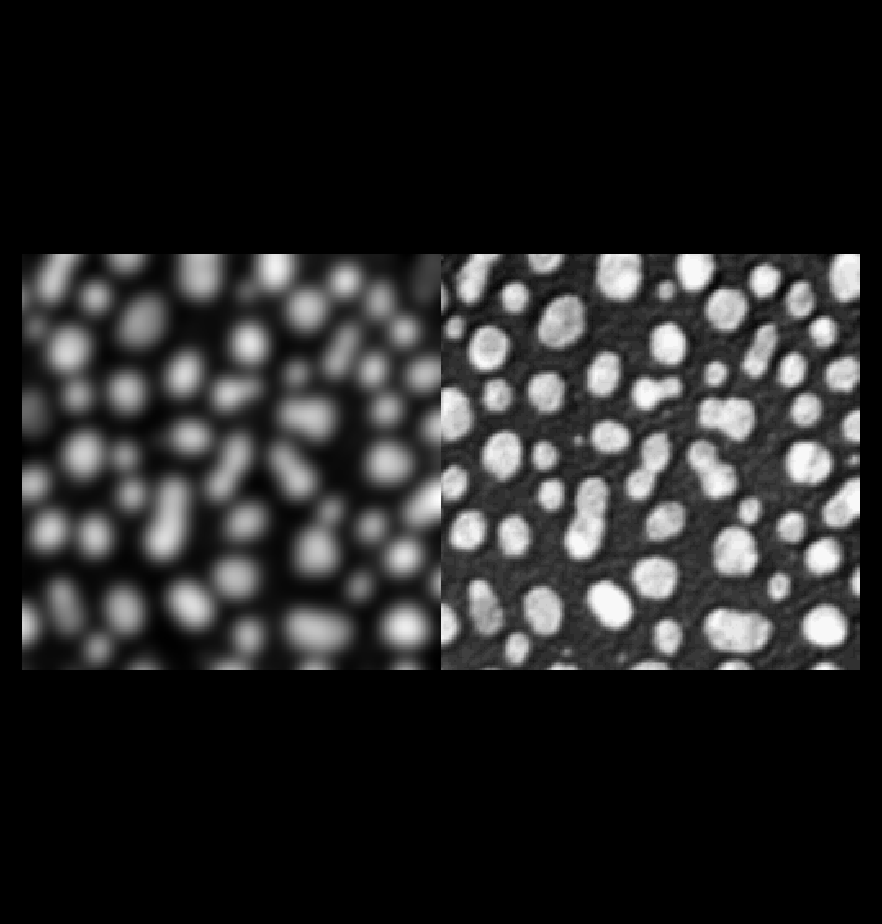

In [7]:
viewer = napari.Viewer()
viewer.add_image(image, name = 'blobs')
viewer.add_image(denoised_image, name = 'denoised from function')
viewer.grid.enabled = True
nbscreenshot(viewer, canvas_only=True)

## Building a GUI with magicgui

Now that we have a properly annotated function, let's apply magicgui to it. We just provide the function itself as argument to magicgui.

In [8]:
preprocess_image2_widget = magicgui(preprocess_image2)

If we check the output, a GUI was automatically built from it. The type of the widget, whether it is a [ComboBox](https://napari.org/magicgui/usage/_autosummary/magicgui.widgets.ComboBox.html) or a [SpinBox](https://napari.org/magicgui/usage/_autosummary/magicgui.widgets.SpinBox.html) depends on the annotations we provided. If you are curious, check default options [here](https://napari.org/magicgui/usage/types_widgets.html#type-to-widget-conversion).

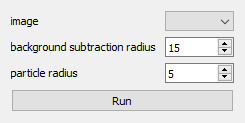

In [9]:
preprocess_image2_widget

The output above is a static image of the interface. But the object that we created is an interactive one. We can add this GUI to napari with the following command.

In [10]:
viewer.window.add_dock_widget(preprocess_image2_widget)

Now go to napari and click on the "Run" button, or run the cell below:

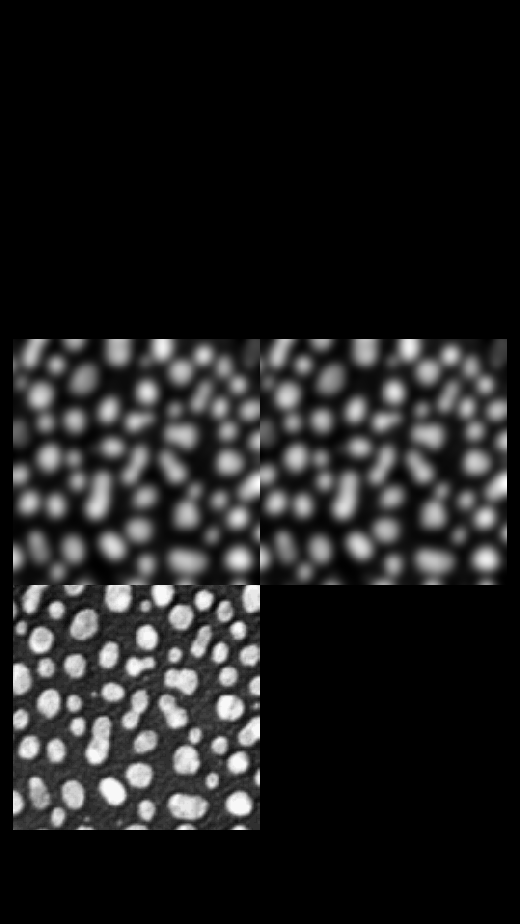

In [13]:
denoised_from_widget = preprocess_image2_widget()
nbscreenshot(viewer, canvas_only=True)

We got the same result. This is awesome! We can now call the **same function** either from code or from a napari widget!